<a href="https://colab.research.google.com/github/Subin-pds/Hotel-booking-Analysis/blob/main/Hotel_Booking_Analysis_(Subin)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# Importing modules of Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from datetime import date


In [2]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Immporting the csv file frome the drive
filepath = '/content/drive/MyDrive/Copy of Hotel Bookings.csv'
df = pd.read_csv(filepath)

# Introduction


Lodging facilities for travellers dated back from time to time. Hotels became an integral part of human civilisations from then on. People accross the globe access hotel facilities during travel and for leisure trips. 

Here we are! , going to look through the perspectives of the hotel. We are here to inspect our *most valuable assets*; ***the data***. Yes, we are going to detect analyse and conclude our findings that can transform the business and the perspectives about the hotel bookings.

# Inspecting the **data**
We need to inspect the data to get the nature of how the data is tabulated and also get the relationship between the different parameters that are collected.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.is_canceled.value_counts()

# **Data Cleaning**

Here we have found two things that might need to clean


1.   We can see the column 'is_canceled' and 'is_repeated_guests' columns are having values as '0' and '1' which will be probably 'True' or 'False' values ie. '0' for ''False' and '1' for 'True'.

2. We have date split into three columns ('arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'). So its good to concatinate those three column value to a single date and remove those columns.




In [ ]:
#Converting the boolean values to yes/no
def convert_boolean_to_string(value):
  if value==0:
    value='No'
  elif value==1:
    value='Yes'
  return value

df['is_canceled']=df.apply(lambda x : convert_boolean_to_string(x['is_canceled']),axis=1)

df['is_repeated_guest']=df.apply(lambda x : convert_boolean_to_string(x['is_repeated_guest']),axis=1)


In [ ]:
#Funtion for joining the columns containing dates
def join(day,month,year):
  if day <=9:
    day = '0' +str(day)
  day=str(day)
  date = day +'/' + month[:3] + '/' + year
  return date
  
#Creating a new column for date by concatinating the different columns containing the date
df['date_of_arrival'] = df.apply(lambda x : join(x['arrival_date_day_of_month'],x['arrival_date_month'],str(x['arrival_date_year'])),axis=1)

## **Question 1:**
Which is the busiest month for hotel with highest number of checkins?


Text(0, 0.5, 'Number of Bookings')

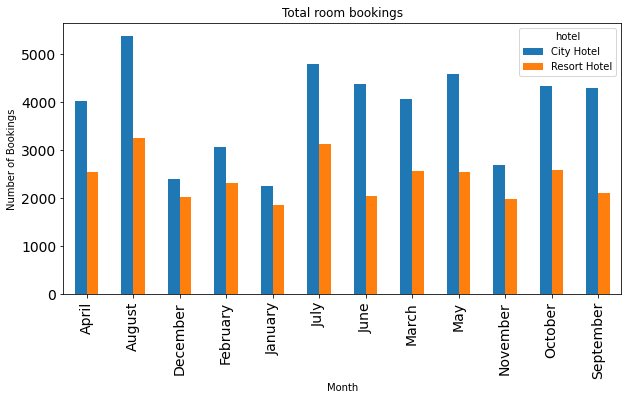

In [ ]:
# Plotting the Total number of bookings in each month for City Hotel and Resort Hotel
from matplotlib import figure
Uncanceled_bookings = df[df['is_canceled']=='No']
canceled_bookings = df[df['is_canceled']=='Yes']
monthly_bookigs = Uncanceled_bookings.groupby(['arrival_date_month','hotel'])['is_canceled'].count().unstack()
x=monthly_bookigs.plot.bar(figsize = (10,5) , fontsize = 14 )
x.set_title("Total room bookings")
x.set_xlabel('Month')
x.set_ylabel('Number of Bookings')

From the graph we have total number of bookings in different months for the year 2015,2016 and 2017 taken together. We can see from the graph the following insight.
1. The least booking months are December, January and February which could be due the extreme cold winter and people are not willing to move out.
2. More number of check-ins are in City Hotel than in resort hotel
3. In Every month the Resort hotels are having almost equal number of bookings with slight changes between months, where as in City hotel its fluctuating.
4. The number of bookings in city hotels peak in the month of August, July

Text(0, 0.5, 'Number of bookings')

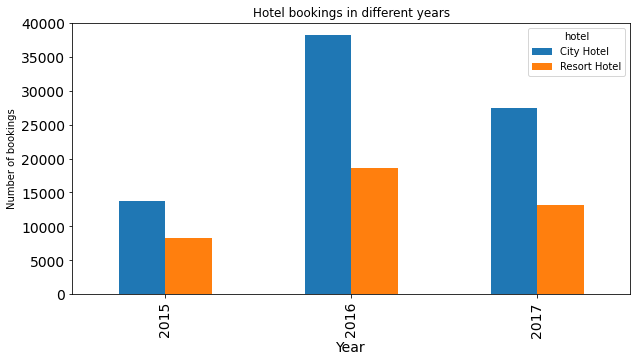

In [ ]:
#
yearly_data = df.groupby('arrival_date_year')['hotel'].value_counts().unstack()
yearly_plot = yearly_data.plot.bar(figsize = (10,5),fontsize = 14)
yearly_plot.set_title('Hotel bookings in different years')
yearly_plot.set_xlabel('Year',fontsize =14)
yearly_plot.set_ylabel('Number of bookings')


# Question 2:
Which nationalities are the most revenue generating customers? 

In [ ]:
citizens_booked = Uncanceled_bookings.groupby(['country','hotel'])['is_canceled'].count().unstack()
citizens_booked


In [ ]:
citizens_booked = Uncanceled_bookings['country'].value_counts()

Text(0, 0.5, 'Number of bookings')

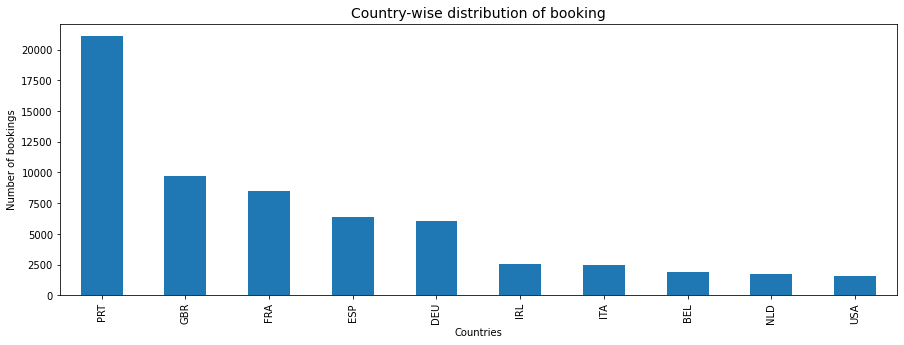

In [ ]:
citizen_plot = citizens_booked.head(10).plot.bar(figsize=(15,5))
citizen_plot.set_title('Country-wise distribution of booking',fontsize=14)
citizen_plot.set_xlabel('Countries')
citizen_plot.set_ylabel('Number of bookings')


We can see that the people of portugal (PRT) are the highest number of customers for the hotel. In the second position we have United Kindom (GBR) and at the third we have France(FRA). Thus portugal countribute for the maximum number of customers for the past 3 years of hotel bookings.

# Question 3:
Which type of customers have highest lead time and finally cancels making huge loss for the hotel?

In [ ]:
customer_avg_leadtime = canceled_bookings.groupby('customer_type')['lead_time'].mean()

Text(0, 0.5, 'Average lead time')

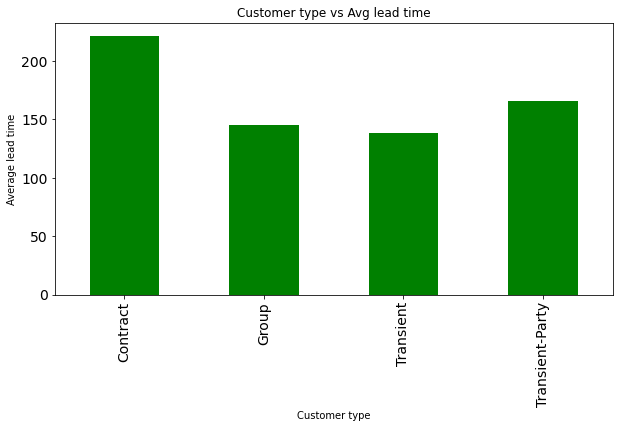

In [ ]:
customer_avg_leadtime.plot.bar(figsize = (10,5) , fontsize = 14, color = 'Green')
plt.title('Customer type vs Avg lead time')
plt.xlabel('Customer type')
plt.ylabel('Average lead time')

Thus we can see that contract type customers are having highest leadtime and finally cancels. Thus the hotel can ask for advanced amount for people of this category to minimize loss and to increse the chance of check-ins.

# Question 4 :
which type of custumers are more prone to cancellations?

In [ ]:
canceled_bookings.groupby('customer_type')['hotel'].count()

customer_type
Contract            1262
Group                 59
Transient          36514
Transient-Party     6389
Name: hotel, dtype: int64

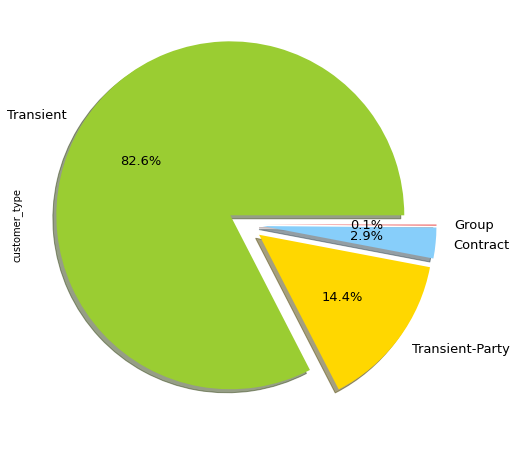

In [ ]:
c=canceled_bookings['customer_type'].value_counts()
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0.1, 0.1, 0.1, 0.1)
c.plot.pie( fontsize = 13, colors=colors, explode=explode,autopct='%1.1f%%', shadow=True, figsize=(8,8))

Thus we can see that Transient type customers are more prone to cancellations. Thus it is better to arrange better management systems within the hotels to handle such type of customers to reduce the losses due to hotel cancellations.

# Question 5:
which is the time when people can book hotels at cheap price?

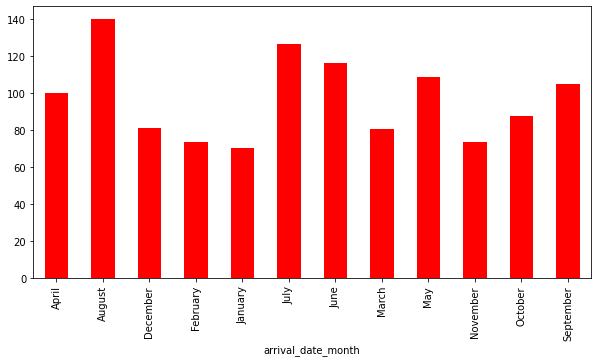

In [ ]:
monthy_avg_rent_rate = df.groupby('arrival_date_month')['adr'].mean()
monthy_avg_rent_rate.plot.bar(color= 'Red')


January is the month having very low cost of booking since the demand is very less during these periods. The number of bookings is very low in these months. Thus following the basic rule price proportional to demand.